# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Import libraries

In [ ]:
import cv2
import os
import shutil
import matplotlib.pyplot as plt
import yaml
import sys
import json
import random
import pandas as pd
import numpy as np
import csv

# Object detection model

Set up EfficientDet. Code retrieved from: https://colab.research.google.com/drive/1ZmbeTro4SqT7h_TfW63MLdqbrCUk_1br#scrollTo=KwDS9qqBbMQa

In [ ]:
#our fork of the Tessellate-Imaging image detection library
#!rm -rf Monk_Object_Detection
! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

# For colab use the command below
# Set up library requirments
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later!
!pip install efficientnet_pytorch
!pip install tensorboardX

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 3794, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 3794 (delta 28), reused 28 (delta 18), pack-reused 3747 (from 1)
Receiving objects: 100% (3794/3794), 132.21 MiB | 36.94 MiB/s, done.
Resolving deltas: 100% (828/828), done.
Updating files: 100% (4032/4032), done.
xargs: warning: options --max-args and -L are mutually exclusive, ignoring previous --max-args value
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 2.3 MB/s eta 0:00:00
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-1we9cz62/pycocotools_1a1cb845842442a5a0b5da8527504f36
  Running command git clone --filter=blob:none

In [ ]:
!curl -L "https://app.roboflow.com/ds/joHs9WphPR?key=DCV2GD3NHH" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1958      0 --:--:-- --:--:-- --:--:--  1962
100 8254k  100 8254k    0     0  2406k      0  0:00:03  0:00:03 --:--:-- 2984k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/11_jpg.rf.26a9e1798e42f38459ea0f3f43118915.jpg  
 extracting: test/14_jpg.rf.e7ddd7b66635b11bd09afaf1390bed7b.jpg  
 extracting: test/15_jpg.rf.f61bbf9f228f9c014e1286f77b92a0f2.jpg  
 extracting: test/17a_jpg.rf.265c39b3fdde0317b1d7c44c6131aa27.jpg  
 extracting: test/20a_jpg.rf.09481250d300a2ae8a55278c64fd98a6.jpg  
 extracting: test/22a_jpg.rf.253c5bb08d05d246d830f0519e35d030.jpg  
 extracting: test/5_jpg.rf.f751b6818a72278b6a61d28665be3cca.jpg  
 extracting: test/6_jpg.rf.a85147f117c95117e1db04b66fbd956d.jpg  
 extracting: test/7_jpg.rf.d1

In [ ]:
# create new directories
!mkdir PretermDetection
!mkdir PretermDetection/annotations # for all annotations
!mkdir PretermDetection/Images # for all images

In [ ]:
# copy the file named _annotations.coco.json located in the train/ directory to the PretermDetection/annotations/ directory,
# and rename it to instances_Images.json
%cp train/_annotations.coco.json PretermDetection/annotations/instances_Images.json

# copy all training images to the Image directory
%cp train/*.jpg PretermDetection/Images/

# Training

Train the EfficientDet model on my dataset. Code retrieved from: https://colab.research.google.com/drive/1ZmbeTro4SqT7h_TfW63MLdqbrCUk_1br#scrollTo=KwDS9qqBbMQa .
Some adjustments were made to tailor it to my code.

In [ ]:
# search in the efficientdet library
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector
detect_gtf = Detector();

# Set the number of GPUs explicitly
detect_gtf.system_dict["local"]["num_gpus"] = 1

/content/Monk_Object_Detection/4_efficientdet/lib/train_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
# directs the model towards file structure
root_dir = "./"
coco_dir = "PretermDetection";
img_dir = "./";
set_dir = "Images";

detect_gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=4, image_size=512, use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
detect_gtf.Model();
detect_gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.01, es_patience=3)

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 137MB/s] 


Loaded pretrained weights for efficientnet-b0


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [ ]:
model_output_dir = "trained/"

detect_gtf.Train(num_epochs=85, model_output_dir=model_output_dir)

  0%|          | 0/36 [00:00<?, ?it/s]

/content/Monk_Object_Detection/4_efficientdet/lib/src/model.py:251: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. Recommended usage would be tensor.shape[0]. Passing a tensor of different shape might lead to errors or silently give incorrect results.
  if len(inputs) == 2:
/content/Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
/content/Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any 

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/36 [00:00<?, ?it/s]

faild onnx export


In [ ]:
# save the trained model to google drive
!cp -r trained/ /content/gdrive/MyDrive/capstone/trained/

# Inference

The inference step is to prepare the model to perform predictions on input images.

In [ ]:
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer
infer_gtf = Infer();

In [ ]:
# load back the model
model_dir = "/content/gdrive/MyDrive/capstone/trained/"
infer_gtf.Model(model_dir=model_dir)

/content/Monk_Object_Detection/4_efficientdet/lib/infer_detector.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.system_dict["local"]["model"] = torch.load(model_d

In [ ]:
#extract class list from our annotations
with open('train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

In [ ]:
class_list

['uca-cl', 'externalostium', 'inneruterine', 'internalostium']

# Model Total Loss

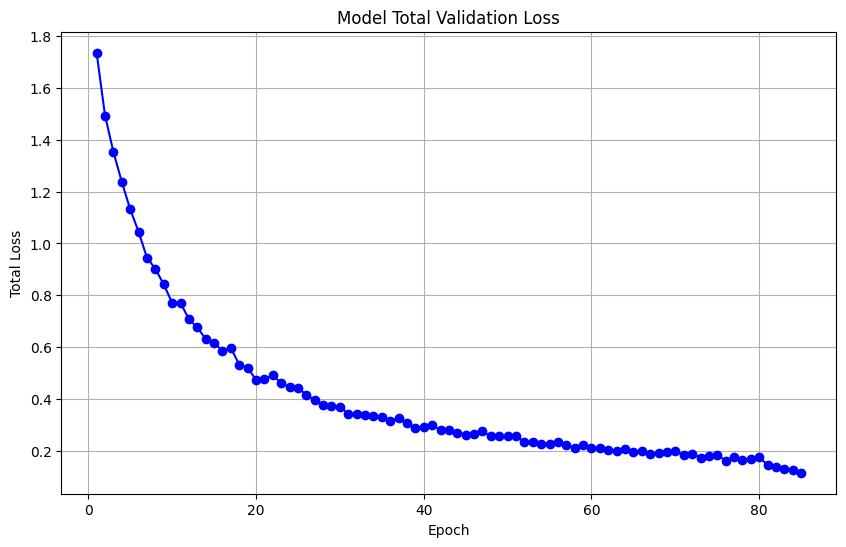

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/gdrive/MyDrive/capstone/model_performance.csv'
data = pd.read_csv(file_path, header=None)

# Extracting the x and y values
epoch = data[0]  # First column (index)
total_loss = data[1]  # Second column (performance values)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(epoch, total_loss, marker='o', linestyle='-', color='b')
plt.title('Model Total Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.grid()
plt.show()

# Testing

In [ ]:
!nvidia-smi

Thu Oct 17 16:20:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              49W / 400W |  40027MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

The following code blocks are used to perform predictions.

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
def best_predictions_per_class(scores, labels, boxes):
  # Create a dictionary to hold the best score and corresponding bounding box for each class
    best_predictions = {}

    # Loop through all predictions
    for score, label, box in zip(scores, labels, boxes):
        label = label.item()  # Convert tensor to an integer
        score = score.item()  # Convert tensor to a float
        box = box.tolist()    # Convert tensor to a list (bounding box coordinates)

        # If this is the first time we're encountering the label, or the current score is higher than the existing one
        if label not in best_predictions or score > best_predictions[label]['score']:
            best_predictions[label] = {'score': score,
                                       'box': box
            }
    return best_predictions

In [ ]:
def check_duplicate_file(file_path):
    if os.path.isfile(file_path):  # Check if the file exists
        os.remove(file_path)  # Delete the file

In [ ]:
test_images_path = '/content/gdrive/MyDrive/capstone/testing/'

test_images = [f for f in os.listdir(test_images_path) if f.endswith('.jpg')]

predictions = []

resize_size = (512, 512)

In [ ]:
# Loop over each image and perform inference
for img_file in test_images:
    img_path = os.path.join(test_images_path, img_file)
    print(f"\nProcessing {img_file}...")

    img = Image.open(img_path)
    img = img.resize(resize_size)  # Resize the image
    img.save(img_path)

    # Perform inference on the image
    detection = infer_gtf.Predict(img_path, class_list)

    if detection:
      duration, scores, labels, boxes = detection

      # Get the best prediction for each class
      best_predictions = best_predictions_per_class(scores, labels, boxes)

      # Store the best prediction for each class in the predictions list
      for class_idx, pred in best_predictions.items():
          predictions.append({
              'Image': img_path,
              'Class': class_list[class_idx],  # Convert label index to class name
              'Class ID': class_idx,
              'Score': pred['score'],
              'Box_xmin': pred['box'][0],
              'Box_ymin': pred['box'][1],
              'Box_xmax': pred['box'][2],
              'Box_ymax': pred['box'][3]
          })

# Convert the list of dictionaries into a DataFrame
df_predictions = pd.DataFrame(predictions)

# Define the output path for the CSV file
output_csv_path = '/content/gdrive/My Drive/capstone/efficientdet_predictions.csv'

# Check if there is exisitng file. If yes, delete existing file
check_duplicate_file(output_csv_path)

# Save the DataFrame as a CSV file
df_predictions.to_csv(output_csv_path, index=False)


Processing 5.jpg...
Done. (0.074s)
NO Object Detected

Processing 6.jpg...
Done. (0.033s)
NO Object Detected

Processing hospital2.jpg...
Done. (0.033s)
NO Object Detected

Processing 11.jpg...
Done. (0.034s)
NO Object Detected

Processing 22a.jpg...
Done. (0.034s)
NO Object Detected

Processing hospital3.jpg...
Done. (0.033s)
NO Object Detected

Processing 15.jpg...
Done. (0.034s)
NO Object Detected

Processing 14.jpg...
Done. (0.033s)
NO Object Detected

Processing 17a.jpg...
Done. (0.114s)

Processing 20a.jpg...
Done. (0.037s)
NO Object Detected

Processing hospital1.jpg...
Done. (0.039s)
NO Object Detected

Processing hospital5.jpg...
Done. (0.034s)
NO Object Detected

Processing hospital4.jpg...
Done. (0.035s)
NO Object Detected

Processing 7.jpg...
Done. (0.035s)
NO Object Detected


# Visualisation: plot a prediction

In [ ]:
from PIL import Image, ImageDraw, ImageFont

/content/gdrive/MyDrive/capstone/extratesting/14.jpg
Image size: (512, 512)


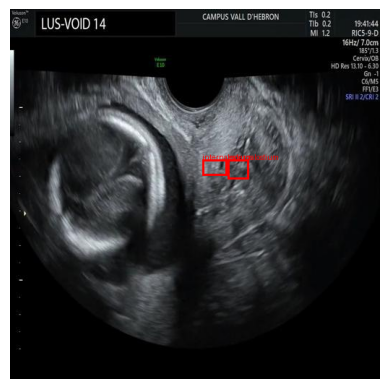

In [ ]:
predictions_path = "/content/gdrive/MyDrive/capstone/efficientdet_predictions.csv"
same_img = False

with open(predictions_path, 'r') as file:
    csvreader = csv.DictReader(file)
    for index, row in enumerate(csvreader):
      if same_img == True:
        next_image_path = row['Image']
        if next_image_path == image_path:
          class_name = row['Class']
          score = row['Score']
          xmin = float(row['Box_xmin'])
          ymin = float(row['Box_ymin'])
          xmax = float(row['Box_xmax'])
          ymax = float(row['Box_ymax'])

          # Draw rectangle and label on the image
          draw.rectangle([(xmin, ymin), (xmax, ymax)], outline='red', width=3)
          draw.text((xmin, ymin - 10), f"{class_name}", fill='red')

      if index == 16:
        # Extract information from the row
        image_path = row['Image']
        print(image_path)
        img = Image.open(image_path)
        print("Image size:", img.size)
        draw = ImageDraw.Draw(img)
        class_name = row['Class']
        score = row['Score']
        xmin = float(row['Box_xmin'])
        ymin = float(row['Box_ymin'])
        xmax = float(row['Box_xmax'])
        ymax = float(row['Box_ymax'])

        # Draw rectangle and label on the image
        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline='red', width=3)
        draw.text((xmin, ymin - 10), f"{class_name}", fill='red')

        same_img = True

# Display the image with the latest predictions
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

/content/gdrive/MyDrive/capstone/extratesting/4.jpg


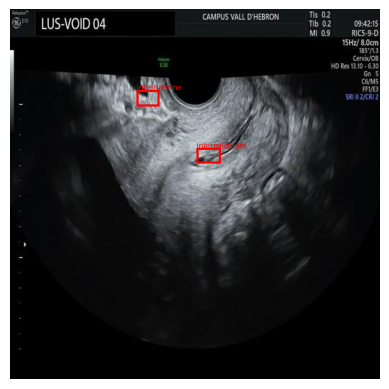

In [ ]:
predictions_path = "/content/gdrive/MyDrive/capstone/efficientdet_predictions.csv"
same_img = False

with open(predictions_path, 'r') as file:
    csvreader = csv.DictReader(file)
    for index, row in enumerate(csvreader):
      if same_img == True:
        next_image_path = row['Image']
        if next_image_path == image_path:
          class_name = row['Class']
          score = row['Score']
          xmin = float(row['Box_xmin'])
          ymin = float(row['Box_ymin'])
          xmax = float(row['Box_xmax'])
          ymax = float(row['Box_ymax'])

          # Draw rectangle and label on the image
          draw.rectangle([(xmin, ymin), (xmax, ymax)], outline='red', width=3)
          draw.text((xmin, ymin - 10), f"{class_name}", fill='red')

      if index == 10:
        # Extract information from the row
        image_path = row['Image']
        print(image_path)
        img = Image.open(image_path)
        draw = ImageDraw.Draw(img)
        class_name = row['Class']
        score = row['Score']
        xmin = float(row['Box_xmin'])
        ymin = float(row['Box_ymin'])
        xmax = float(row['Box_xmax'])
        ymax = float(row['Box_ymax'])

        # Draw rectangle and label on the image
        draw.rectangle([(xmin, ymin), (xmax, ymax)], outline='red', width=3)
        draw.text((xmin, ymin - 10), f"{class_name}", fill='red')

        same_img = True

# Display the image with the latest predictions
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Evaluation of Object Detection Model

In [ ]:
import torch
from pathlib import Path
import cv2
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

Copies the ground truth annotations to google drive for viewing

In [ ]:
!cp -r train/_annotations.coco.json /content/gdrive/MyDrive/capstone/

In [ ]:
!cp -r test/_annotations.coco.json /content/gdrive/MyDrive/capstone/

In [ ]:
!cp -r valid/_annotations.coco.json /content/gdrive/MyDrive/capstone/

Since the predictions are made on resized images, the ground truth annotations are scaled accordingly to ensure consistency

In [ ]:
# Load the annotation file
with open('/content/gdrive/MyDrive/capstone/_annotations.coco.json', 'r') as f:
    data = json.load(f)

# Set the new dimensions
new_width, new_height = 512, 512

# Process each image and adjust the bounding boxes
for image in data['images']:
    original_width = image['width']
    original_height = image['height']

    # Calculate scaling factors
    x_scale = new_width / original_width
    y_scale = new_height / original_height

    # Update image dimensions
    image['width'] = new_width
    image['height'] = new_height

    # Find and update annotations for this image
    image_id = image['id']
    for annotation in data['annotations']:
        if annotation['image_id'] == image_id:
            # Scale bounding box coordinates
            bbox = annotation['bbox']
            bbox[0] *= x_scale  # xmin
            bbox[1] *= y_scale  # ymin
            bbox[2] *= x_scale  # width
            bbox[3] *= y_scale  # height
            annotation['bbox'] = bbox

# Save the updated annotations to a new file
with open('/content/gdrive/MyDrive/capstone/test_resized_annotation_file.json', 'w') as f:
    json.dump(data, f, indent=4)

In [ ]:
# Function to compute IoU
def compute_iou(box1, box2):
  x1, y1, x2, y2 = box1
  x1g, y1g, x2g, y2g = box2

  xi1 = max(x1, x1g)
  yi1 = max(y1, y1g)
  xi2 = min(x2, x2g)
  yi2 = min(y2, y2g)
  inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

  box1_area = (x2 - x1) * (y2 - y1)
  box2_area = (x2g - x1g) * (y2g - y1g)
  union_area = box1_area + box2_area - inter_area

  return inter_area / union_area

Code block to calculate the IoU

In [ ]:
def calculate_ap_ar(predictions, ground_truth_count, iou_threshold):
    predictions = sorted(predictions, key=lambda x: x[1], reverse=True)
    tp, fp = 0, 0
    tp_list, fp_list = [], []
    for iou, score in predictions:
        if iou >= iou_threshold:
            tp += 1
            tp_list.append(tp)
            fp_list.append(fp)
        else:
            fp += 1
            tp_list.append(tp)
            fp_list.append(fp)

    # Calculate precision and recall at each threshold
    precisions = [tp / (tp + fp) if (tp + fp) > 0 else 0 for tp, fp in zip(tp_list, fp_list)]
    recalls = [tp / ground_truth_count if ground_truth_count > 0 else 0 for tp in tp_list]

    # Calculate AP by averaging precision at different recall levels
    ap = 0.0
    for i in range(1, len(precisions)):
        if recalls[i] != recalls[i - 1]:
            ap += precisions[i] * (recalls[i] - recalls[i - 1])

    # Calculate AR by averaging recall over precision levels
    ar = 0.0
    for i in range(1, len(recalls)):
        if precisions[i] != precisions[i - 1]:
            ar += recalls[i] * (precisions[i] - precisions[i - 1])

    return ap, ar

In [ ]:
gt_annotations = '/content/gdrive/MyDrive/capstone/gt_efficientdet_predictions.csv'
iou_array = []
iou_threshold = 0.01

# Initialize dictionaries to store true positives, false positives, and ground truth counts per class
classwise_predictions = {}
classwise_ground_truths = {}

with open(gt_annotations, 'r') as file:
    csvreader = csv.DictReader(file)
    for row in csvreader:
        image_path = row['Image']
        class_name = row['Class']
        class_id = int(row['Class ID'])
        score = float(row['Score'])
        xmin = float(row['Box_xmin'])
        ymin = float(row['Box_ymin'])
        xmax = float(row['Box_xmax'])
        ymax = float(row['Box_ymax'])
        gt_xmin = float(row['Box_xmin_gt'])
        gt_ymin = float(row['Box_ymin_gt'])
        gt_xmax = float(row['Box_xmax_gt'])
        gt_ymax = float(row['Box_ymax_gt'])

        # Store the boxes and IoU calculations
        pred_box = [xmin, ymin, xmax, ymax]
        gt_box = [gt_xmin, gt_ymin, gt_xmax, gt_ymax]
        iou = compute_iou(pred_box, gt_box)
        iou_array.append(iou)

        # Initialize class lists if not present
        if class_id not in classwise_predictions:
            classwise_predictions[class_id] = []
            classwise_ground_truths[class_id] = 0

        # Add prediction and ground truth data
        classwise_predictions[class_id].append((iou, score))
        classwise_ground_truths[class_id] += 1

In [ ]:
average_precisions = []
average_recalls = []
for class_id, predictions in classwise_predictions.items():
    ap, ar = calculate_ap_ar(predictions, classwise_ground_truths[class_id], iou_threshold)
    average_precisions.append(ap)
    average_recalls.append(ar)

mAP = np.mean(average_precisions) if average_precisions else 0
mAR = np.mean(average_recalls) if average_recalls else 0
average_iou = np.mean(iou_array)

# Output the results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("IoU Values: \n")
for iou in iou_array:
  print(iou)
print("Average IoU: ", average_iou)
print("mAP: ", mAP)
print("mAR: ", mAR)

Precision:  0.45
Recall:  0.45
F1 Score:  0.45
IoU Values:  [0.0, 0.0, 0.20854224758606638, 0.25697260543849276, 0.06639704223378366, 0.0, 0.0, 0.46802689225237804, 0.1719763346088132, 0.0, 0.16587270637520748, 0.0, 0.5439922450322645, 0.47714816230673823, 0.0, 0.0, 0.0, 0.0, 0.48698838621817353, 0.0]
Average IoU:  0.1422958311025959
mAP:  0.16368102796674225
mAR:  0.0007187917902203531


# Angle and length calculation algorithm

In [ ]:
from PIL import Image
from io import BytesIO
import csv
import math

Function to calculate UCA

In [ ]:
def cal_uca(p1, p2, p3):
  # Convert predictions to float for calculation
  x1, y1 = float(p1['Box_xmin']), float(p1['Box_ymin'])
  x2, y2 = float(p2['Box_xmin']), float(p2['Box_ymin'])
  x3, y3 = float(p3['Box_xmin']), float(p3['Box_ymin'])

  # Create vectors
  vector_1_3 = (x3 - x1, y3 - y1)
  vector_2_3 = (x3 - x2, y3 - y2)

  # Calculate the dot product of the vectors
  dot_prod = vector_1_3[0] * vector_2_3[0] + vector_1_3[1] * vector_2_3[1]

  # Calculate the magnitude (length) of each vector
  mag_v1 = math.sqrt(vector_1_3[0]**2 + vector_1_3[1]**2)
  mag_v2 = math.sqrt(vector_2_3[0]**2 + vector_2_3[1]**2)

  # Calculate the angle in radians between the two vectors
  angle_radians = math.acos(dot_prod / (mag_v1 * mag_v2))

  # Convert the angle from radians to degrees
  angle_degrees = math.degrees(angle_radians)

  return angle_degrees

Function to calculate cervical length

In [ ]:
def cal_cervical_length(p2, p3):
  x1, y1 = float(p2['Box_xmin']), float(p2['Box_ymin'])
  x2, y2 = float(p3['Box_xmin']), float(p3['Box_ymin'])
  cl = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return cl

Calculate all UCAs and CLs

In [ ]:
def get_class_id(prediction):
  class_id = int(prediction['Class ID'])
  return class_id

In [ ]:
predictions_path = "/content/gdrive/MyDrive/capstone/sample_efficientdet_predictions.csv" # Remember to delete 'sample' during official run

# empty arrays to save all UCAs and CLs
uca_array = []
cl_array = []

with open(predictions_path, 'r') as file:
    csvreader = csv.DictReader(file)

    # Create a dictionary to store predictions for each image
    predictions_by_image = {}

    # Organize predictions by image path
    for row in csvreader:
        image_path = row['Image']
        if image_path not in predictions_by_image:
            predictions_by_image[image_path] = []
        predictions_by_image[image_path].append(row)

    # Iterate through each image's predictions
    for image_path, predictions in predictions_by_image.items():
        # Check if there are exactly 3 predictions
        if len(predictions) == 3:
            # Get the class_id of each prediction
            class_ids = sorted([int(pred['Class ID']) for pred in predictions])

            # Check if the class_ids are 0, 1, and 2
            if class_ids == [0, 1, 2]:
                # Sort predictions by class_id (0, 1, 2)
                predictions_sorted = sorted(predictions, key=get_class_id)

                # Calculate UCA and cervical length (CL)
                uca = cal_uca(predictions_sorted[0], predictions_sorted[1], predictions_sorted[2])
                uca_array.append(uca)

                cl = cal_cervical_length(predictions_sorted[1], predictions_sorted[2])
                cl_array.append(cl)
            else:
                # If class_ids are not 0, 1, 2, skip this image
                continue
        else:
            # If there aren't exactly 3 predictions, skip this image
            continue

# Output the results
print("UCA Array:", uca_array)
print("Cervical Length Array:", cl_array)

UCA Array: [74.62276353825975, 83.23382517744695, 148.64143446570915, 53.633767654223746, 138.00972326380415, 143.4889438805047, 103.33388162403651, 97.59192477214201, 139.18520904258602, 109.24886503256278, 141.91540342453786, 48.40513111428203, 65.00264032752027, 178.9157272946408, 161.33717632318763]
Cervical Length Array: [146.5127980757995, 79.71198153351854, 194.74342094150447, 148.07092894960846, 144.61673485458036, 149.90663761154806, 191.92706948213427, 154.1590088188167, 241.22396232547047, 276.1539425755135, 149.27156460625713, 247.42069436488129, 255.53864678361276, 150.8409758653132, 199.2636444512646]


Save data into a csv file

In [ ]:
with open('efficientdet_uca_cl_data.txt', 'w') as file:
  writer = csv.writer(file)
  # write the header row
  writer.writerow(['UCA', 'CL'])
  # write the data rows
  for i in range(len(uca_array)):
    writer.writerow([uca_array[i], cl_array[i]])

# Machine Learning Model

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
uca_cl_path = "/content/gdrive/MyDrive/capstone/sample_uca_cl.csv" # Remember to delete 'sample' during official run

In [ ]:
# Read the data from the CSV file
df = pd.read_csv(uca_cl_path)

# Extract UCA and CL data into arrays
uca_array = df['UCA'].values
cl_array = df['CL'].values

In [ ]:
# Create a DataFrame with UCA, CL, and their respective cluster labels
df = pd.DataFrame({'UCA': uca_array, 'CL': cl_array})

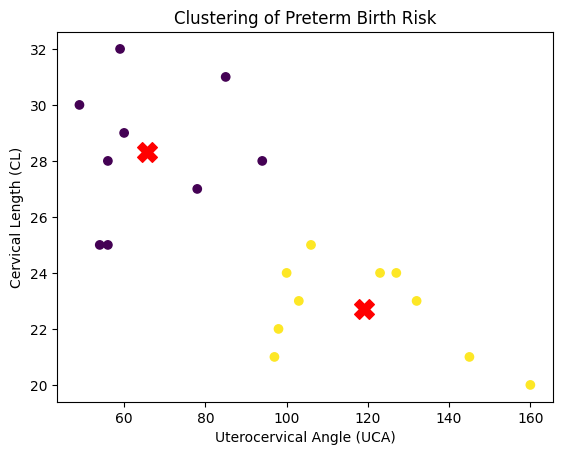

In [ ]:
# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the Clusters
plt.scatter(df['UCA'], df['CL'], c=df['Cluster'], cmap='viridis')

# plot the controids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Uterocervical Angle (UCA)')
plt.ylabel('Cervical Length (CL)')
plt.title('Clustering of Preterm Birth Risk')
plt.show()

In [ ]:
# calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.545234694835851
